# Homework1 : Car Fuel


## Day 1 

## about this project

### Context
I am driving always the same car and i take almost always the same route. However, at the gas station i like to change the gas type; between SP98 (sold as "Super plus" sometimes) and SP95 E10 (This is, "super" gas with 10% Alcohol). E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.

From my feeling i would say that my car consumes a lot more with E10. From the data, what can we derive there? I challenge you to partial out the factor "E10 gas" and tell me how much my car really consumes more with it.

I applied my own basic linear regression on it and had as a result that it consumes 0.4 liters more with E10 gas. Linear regressions have the disadvantage that you can only really use them if the features are independent.

I challenge you to predict the consumption depending on the gas type!


### Content
Since a few months, i write down the data of my car's display after each ride; while regularly changing the gas type.

In the file, you will find the displayed distance (km); the consume (L/100km); the average speed (km/h), the temperature i had inside (°C), the temperature outside (°C), anything special that happened, if it was raining, if the air condition was on, if it was sunny enough that the car felt warm when i started it... and yes - the gas type i was using. I have also two columns saying how much and which gas type I was buying. Careful with those. The numbers don't add exactly up, because I note only the rides that occur under certain conditions: If the car was not cooling down enough to have another independent measure from the one before, i don't note it.

I started writing down the data in November, changed to SP98 in winter, and back to E10 in spring. Apart from that, the data is rather clean as i was doing my own project on it already.

### Acknowledgements
Thanks to Victor Chernozhukov who was planting this idea in my head, even if it took some years until i finally acted on it. :-)

### Inspiration
I was using a linear regression to partial out the influence of the gas type. The gas type is truly independent from the rest of the variables, so it should be possible without problem. However - depending on how i engineer the other features, the result is between 0.4 and 0.8 liters per 100km influence. A large, single-feature-depending difference usually is a hint for lots of covariance between the features; meaning in turn that linear regression might not be the best tool here.

### (1) Undertand data

In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_flue = pd.read_csv("data/measurements.csv")

df_flue = df_flue.filter(items=['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'gas_type'])
for k in ["consume","temp_inside"]:
    df_flue[k] = df_flue[k].str.replace(",", ".").astype(float)
df_flue["temp_diff"] = df_flue["temp_inside"] - df_flue["temp_outside"]
print(df_flue["temp_diff"])

df_e10 = df_flue[df_flue['gas_type'].str.contains('E10')].dropna(how='any')
df_sp98 = df_flue[df_flue['gas_type'].str.contains('SP98')].dropna(how='any')

df_e10.describe()
# df_sp98.describe()



0       9.5
1       8.5
2       6.5
3       7.5
4       6.5
5      11.5
6      10.5
7      15.5
8      17.5
9      12.5
10     17.5
11     21.5
12     11.5
13      9.5
14     10.5
15     16.5
16     18.5
17     18.5
18     13.5
19     17.5
20     18.5
21     20.5
22     20.5
23     20.5
24     15.5
25     12.5
26     20.5
27     18.5
28     20.5
29     17.5
       ... 
358    -2.0
359     0.0
360     5.0
361     7.0
362     4.0
363    -1.0
364     4.0
365    -4.0
366    -4.5
367    -5.5
368     1.0
369    -8.0
370     3.0
371     1.0
372    -4.0
373    -3.0
374     2.0
375     6.0
376     3.0
377    -4.0
378     7.5
379     1.5
380    -2.5
381    -3.5
382    -3.5
383     6.5
384    -6.0
385     6.0
386    -6.0
387    -5.0
Name: temp_diff, Length: 388, dtype: float64


,consume,speed,temp_inside,temp_outside,temp_diff
count,157.000000,157.000000,157.000000,157.000000,157.000000
mean,4.950955,43.566879,21.917197,10.031847,11.885350
std,0.897976,14.154946,0.659854,6.379475,6.133628
min,3.700000,14.000000,21.000000,-5.000000,-3.000000
25%,4.400000,35.000000,21.500000,6.000000,8.500000
50%,4.800000,42.000000,21.500000,9.000000,12.500000
75%,5.300000,51.000000,22.500000,14.000000,15.500000
max,10.800000,88.000000,25.000000,27.000000,26.000000


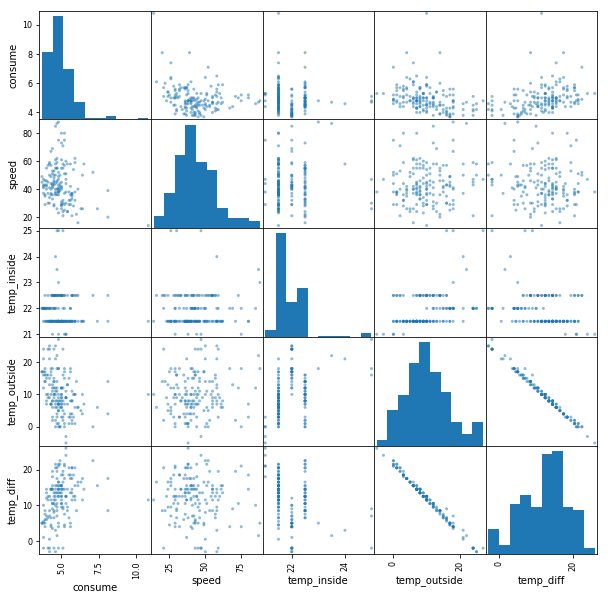

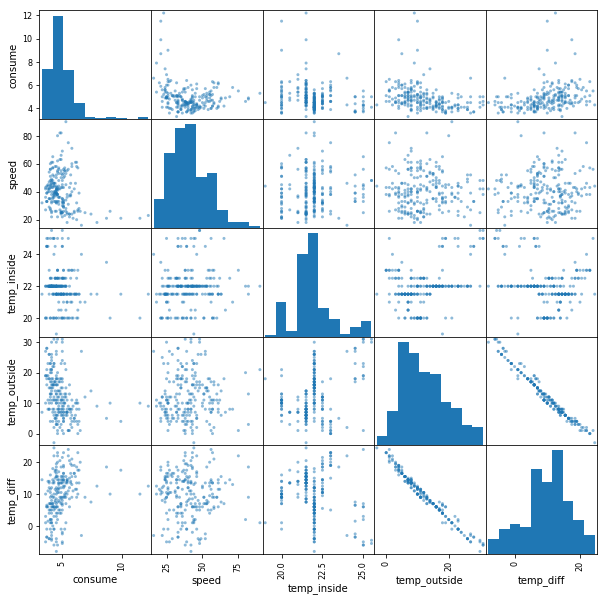

In [20]:

#display(df_e10.head(100))
pd.plotting.scatter_matrix(df_e10, figsize=(10,10))
plt.show()

# display(df_sp98.head(100))
pd.plotting.scatter_matrix(df_sp98, figsize=(10,10))
plt.show()

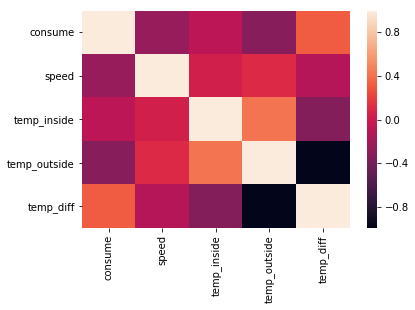

In [21]:
# 相関係数を確認
df_e10.corr()
sns.heatmap(df_e10.corr())
plt.show()

# Consideration

Based on these result.
1. Distance should not be used. Because these data come from almost same circmstances.
2. To predict the consumption, we can only use data which can measure before the ride.
3. The condition of AC should be related but if we calculate temp_diff from outside and inside, that contains.

in conclusion, I will try to find the correation between "temp_diff" and "consumpt"


w0 = 0.000, w1 = 2.394, 二乗誤差 = 2633.881


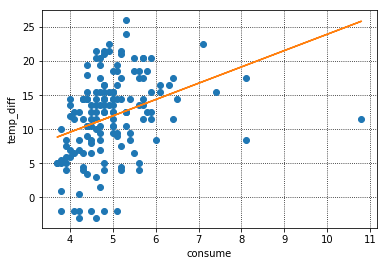

In [40]:
x = df_e10["consume"].values
y = df_e10["temp_diff"].values

X = x.reshape(-1,1)
regr = LinearRegression(fit_intercept=False)
regr.fit(X, y)

y_est_sklearn = regr.intercept_ + regr.coef_[0] * x
squared_error = 0.5 * np.sum( (y_est_sklearn - y) ** 2)
print("w0 = {:.3f}, w1 = {:.3f}, 二乗誤差 = {:.3f}".format(regr.intercept_, regr.coef_[0], squared_error))

# グラフに重ねて表示する
plt.plot(x, y, 'o')
plt.ylabel("temp_diff")
plt.xlabel("consume")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(X, y_est_sklearn)
plt.show()

w0 = 0.000, w1 = 1.965, 二乗誤差 = 4926.490


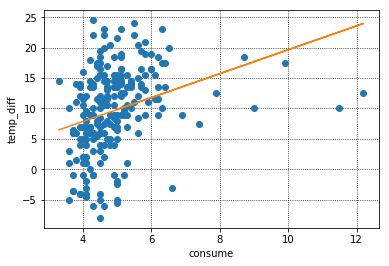

In [43]:
x = df_sp98["consume"].values
y = df_sp98["temp_diff"].values

X = x.reshape(-1,1)
regr = LinearRegression(fit_intercept=False)
regr.fit(X, y)

y_est_sklearn = regr.intercept_ + regr.coef_[0] * x
squared_error = 0.5 * np.sum( (y_est_sklearn - y) ** 2)
print("w0 = {:.3f}, w1 = {:.3f}, 二乗誤差 = {:.3f}".format(regr.intercept_, regr.coef_[0], squared_error))

# グラフに重ねて表示する
plt.plot(x, y, 'o')
plt.ylabel("temp_diff")
plt.xlabel("consume")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(X, y_est_sklearn)
plt.show()